NAIROBI OZONESONDE DATA AVAILABILITY

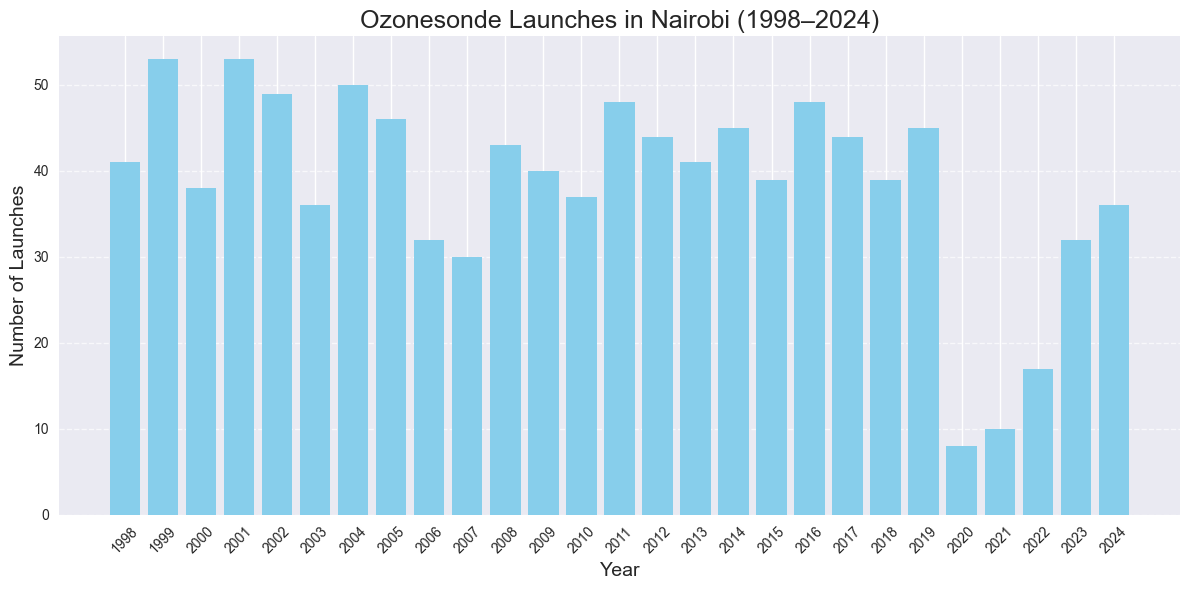

In [11]:
import os
import matplotlib.pyplot as plt

# data Configuration
base_dir = "Ozonesondes"
start_year, end_year = 1998, 2024

years = sorted({
    int(tok)
    for d in os.listdir(base_dir)
    if os.path.isdir(os.path.join(base_dir, d))
    for tok in d.split("_")
    if tok.isdigit() and start_year <= int(tok) <= end_year
})

# Count launches per year
launch_counts = []
for year in years:
    year_folder = f"shadoz_nairobi_{year}_V06"
    path = os.path.join(base_dir, year_folder)
    try:
        files = [f for f in os.listdir(path)
                 if os.path.isfile(os.path.join(path, f))]
        count = len(files)
    except FileNotFoundError:
        count = 0
    launch_counts.append(count)

# Plotting 
plt.style.use("seaborn-v0_8")
fig, ax = plt.subplots(figsize=(12, 6))

ax.bar(years, launch_counts, color="skyblue")
ax.set_title("Ozonesonde Launches in Nairobi (1998–2024)", fontsize=18)
ax.set_xlabel("Year", fontsize=14)
ax.set_ylabel("Number of Launches", fontsize=14)

ax.set_xticks(years)
ax.set_xticklabels(years, rotation=45, fontsize=10)
ax.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()
